In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [3]:
import tensorflow as tf
tf

<module 'tensorflow' from 'D:\\Anaconda3\\Lib\\site-packages\\tensorflow\\__init__.py'>

In [4]:
tf

<module 'tensorflow' from 'D:\\Anaconda3\\Lib\\site-packages\\tensorflow\\__init__.py'>

In [184]:
import os

BASE_PATH = "D:\cubicasa5k"

print(os.listdir(BASE_PATH))


['colorful', 'high_quality', 'high_quality_architectural', 'test.txt', 'train.txt', 'val.txt']


In [187]:
subset_path = os.path.join(BASE_PATH, "high_quality")
print(os.listdir(subset_path))


['10004', '10010', '10014', '10017', '10037', '10064', '1007', '10072', '10083', '10112', '10132', '10135', '10173', '1019', '10191', '10199', '10210', '10221', '10241', '1025', '10282', '10293', '10297', '103', '10306', '10316', '10332', '10334', '1034', '10346', '1035', '10356', '1036', '10360', '10362', '10385', '10386', '1039', '10391', '10392', '10395', '10403', '10408', '10413', '10414', '10422', '10423', '10441', '10443', '10457', '10458', '10470', '10504', '10519', '10525', '10538', '10541', '10552', '10568', '10586', '10587', '10602', '10615', '10635', '10666', '10669', '10674', '10676', '10689', '107', '1072', '10721', '10722', '10748', '10757', '10776', '1078', '10785', '10789', '10796', '108', '1081', '1082', '1092', '1095', '1097', '11038', '11039', '11078', '11088', '11091', '11095', '11107', '11131', '11132', '1115', '11186', '11197', '11208', '11211', '11221', '11246', '11255', '11256', '11262', '11263', '11271', '11272', '11296', '11317', '11357', '11362', '11365', '11

In [188]:
sample_id = "10004"
sample_path = os.path.join(BASE_PATH, "high_quality", sample_id)

print(os.listdir(sample_path))


['F1_original.png', 'F1_scaled.png', 'mask_full.png', 'model.svg']


In [189]:
pip install opencv-python

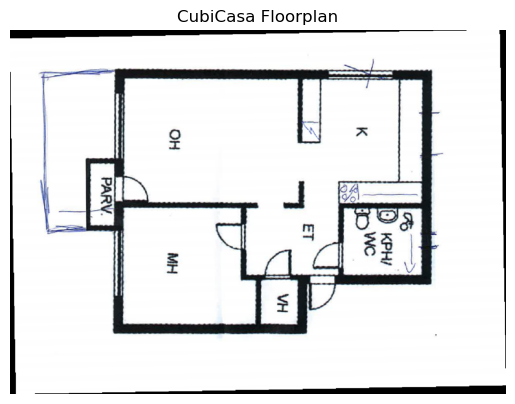

In [190]:
import cv2
import matplotlib.pyplot as plt
import os

img_path = os.path.join(sample_path, "F1_scaled.png")

img = cv2.imread(img_path)

# ALWAYS check this before cvtColor
if img is None:
    raise FileNotFoundError(f"Image not found at {img_path}")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("CubiCasa Floorplan")
plt.axis("off")
plt.show()


In [8]:
pip install lxml svgpathtools shapely


   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 16.3 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [svgwrite]
   ---------------------------------------- 0/3 [svgwrite]
   ---------------------------------------- 0/3 [svgwrite]
   ---------------------------------------- 0/3 [svgwrite]
   ------------- -------------------------- 1/3 [shapely]
   ------------- -------------------------- 1/3 [shapely]
   ------------- -------------------------- 1/3 [shapely]
   ------------- -------------------------- 1/3 [shapely]
   ------------- -------------------------- 1/3 [shapely]
   ------------- -------------------------- 1/3 [shapely]
   ------------- -------------------------- 1/3 [shapely]
   ------------- -------------------------- 1/3 [shapely]
   ------------- -------------------------- 1/3 [shapely]
   ------------- -------------------------- 1/3 [shapely]
   ------------- --------------------

In [191]:
from lxml import etree

svg_path = os.path.join(sample_path, "model.svg")
tree = etree.parse(svg_path)
root = tree.getroot()

ns = {"svg": "http://www.w3.org/2000/svg"}

print("Top-level tags:")
for child in root:
    print(child.tag)


Top-level tags:
{http://www.w3.org/2000/svg}defs
{http://www.w3.org/2000/svg}g


In [85]:
pip install svglib reportlab pillow

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 14.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ---------------------------------------- 4.0/4.0 MB 33.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/814.6 kB ? eta -:--:--
   --------------------------------------- 814.6/814.6 kB 23.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/844.1 kB ? eta -:--:--
   --------------------------------------- 844.1/844.1 kB 17.9 MB/s eta 0:00:00

   ---------------------------------------- 0/6 [reportlab]
   ---------------------------------------- 0/6 [reportlab]
   ---------------------------------------- 0/6 [reportlab]
   ---------------------------------------- 0/6 [reportlab]
   ---------------------------------------- 0/6 [reportlab]
   ---------------------------------------- 0/6 [reportlab]
   ---------------------------------------- 0

  You can safely remove it manually.


In [192]:
import subprocess

inkscape_path = r"D:\Inkscape\bin\inkscape.exe"  # adjust if needed

subprocess.run([inkscape_path, "--version"], check=True)


CompletedProcess(args=['D:\\Inkscape\\bin\\inkscape.exe', '--version'], returncode=0)

In [193]:
import os
import subprocess

inkscape = r"D:\Inkscape\bin\inkscape.exe"  # adjust if needed

svg_path = os.path.join(sample_path, "model.svg")
out_png = os.path.join(sample_path, "mask_full.png")

cmd = [
    inkscape,
    svg_path,
    "--export-type=png",
    "--export-filename", out_png,
    "--export-width=1024",
    "--export-height=1024"
]

subprocess.run(cmd, check=True)
print("Saved:", out_png)



Saved: D:\cubicasa5k\high_quality\10004\mask_full.png


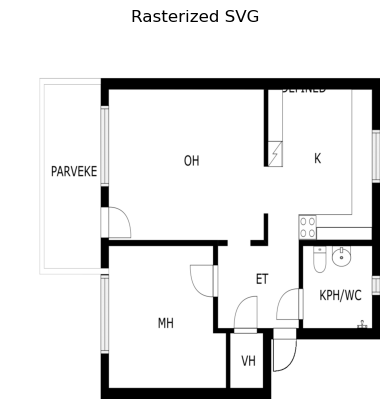

In [194]:
import cv2
import matplotlib.pyplot as plt

mask = cv2.imread(out_png, cv2.IMREAD_GRAYSCALE)

plt.imshow(mask, cmap="gray")
plt.title("Rasterized SVG")
plt.axis("off")
plt.show()


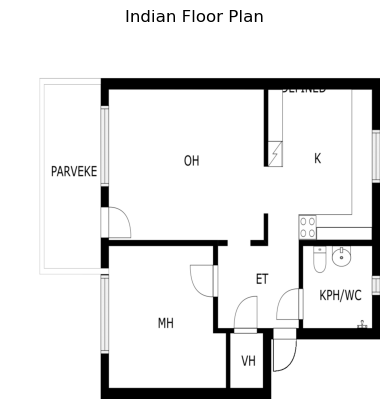

In [195]:
import cv2
import matplotlib.pyplot as plt

# img_path = r"D:\floor.jpg"   # <-- your Indian plan

img = cv2.imread(out_png, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Indian Floor Plan")
plt.show()


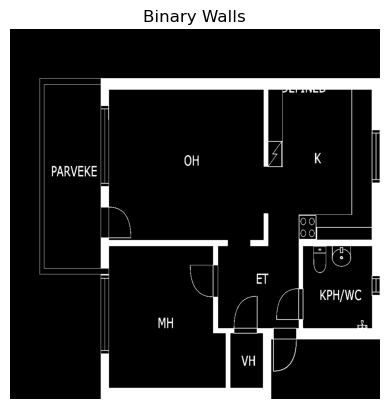

In [197]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread(out_png, cv2.IMREAD_GRAYSCALE)
# img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Invert so walls = white
# remove text by blurring
img_blur = cv2.GaussianBlur(img, (7,7), 0)
_, binary = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap="gray")
plt.title("Binary Walls")
plt.axis("off")
plt.show()


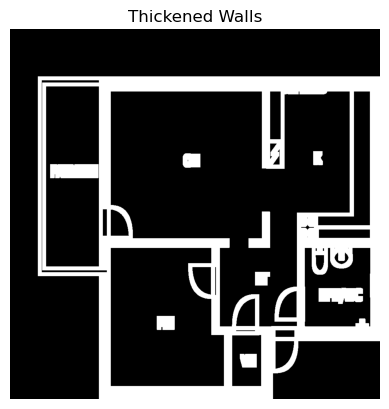

In [207]:
# kernel = np.ones((7,7), np.uint8)
# walls = cv2.dilate(binary, kernel, iterations=1)

# kernel = np.ones((9,9), np.uint8)
# walls = cv2.dilate(binary, kernel, iterations=1)

kernel = np.ones((11,11), np.uint8)  # bigger kernel closes door gaps
walls = cv2.dilate(binary, kernel, iterations=1)


plt.imshow(walls, cmap="gray")
plt.title("Thickened Walls")
plt.axis("off")
plt.show()


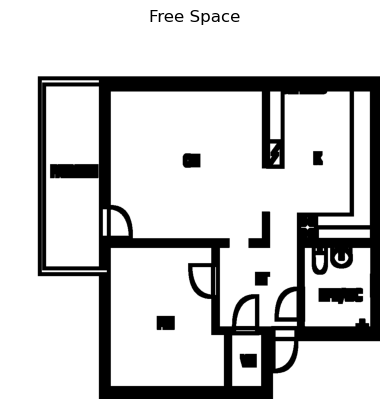

In [208]:
free_space = cv2.bitwise_not(walls)

plt.imshow(free_space, cmap="gray")
plt.title("Free Space")
plt.axis("off")
plt.show()


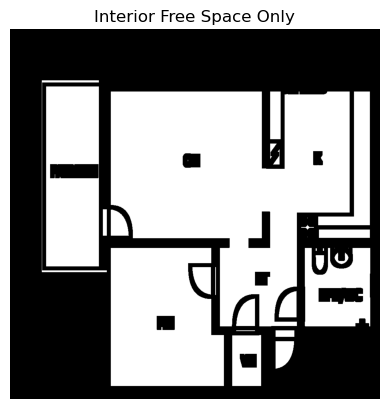

In [209]:
# h, w = free_space.shape
# mask = np.zeros((h+2, w+2), np.uint8)

# floodfill = free_space.copy()
# cv2.floodFill(floodfill, mask, (0,0), 0)

h, w = free_space.shape
floodfill = free_space.copy()
mask = np.zeros((h+2, w+2), np.uint8)

# try multiple corners to guarantee exterior
for seed in [(0,0), (w-1,0), (0,h-1), (w-1,h-1)]:
    cv2.floodFill(floodfill, mask, seed, 0)

plt.imshow(floodfill, cmap="gray")
plt.title("Interior Free Space Only")
plt.axis("off")
plt.show()


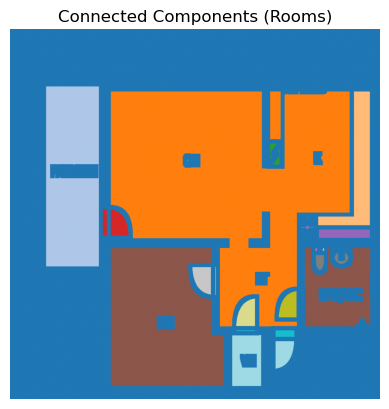

In [210]:
from skimage.measure import label, regionprops

labels = label(floodfill)

plt.imshow(labels, cmap="tab20")
plt.title("Connected Components (Rooms)")
plt.axis("off")
plt.show()


In [211]:
rooms = []

for r in regionprops(labels):
    if r.area < 1500:
        continue
    rooms.append(r)

MIN_ROOM_AREA = 4000  # tune: 3000–6000

rooms = [r for r in rooms if r.area > MIN_ROOM_AREA]
print("Rooms detected:", len(rooms))


Rooms detected: 6


In [104]:
kernel = np.ones((9,9), np.uint8)
walls = cv2.dilate(binary, kernel, iterations=1)


In [212]:
import shapely.geometry as geom

room_polys = []
for r in rooms:
    coords = r.coords[:, ::-1]  # (row,col) → (x,y)
    poly = geom.Polygon(coords)
    room_polys.append(poly)


In [213]:
MERGE_RATIO = 0.35  # small room threshold

merged = []
used = set()

for i, p in enumerate(room_polys):
    if i in used:
        continue

    area_i = p.area
    neighbors = []

    for j, q in enumerate(room_polys):
        if i == j:
            continue
        if p.touches(q):
            neighbors.append((j, q))

    # merge small regions touching one large region
    if area_i < MERGE_RATIO * max([q.area for _, q in neighbors] + [area_i]):
        for j, q in neighbors:
            if q.area > area_i:
                p = p.union(q)
                used.add(j)

    merged.append(p)
    used.add(i)

final_rooms = merged
print("Final rooms:", len(final_rooms))


Final rooms: 6


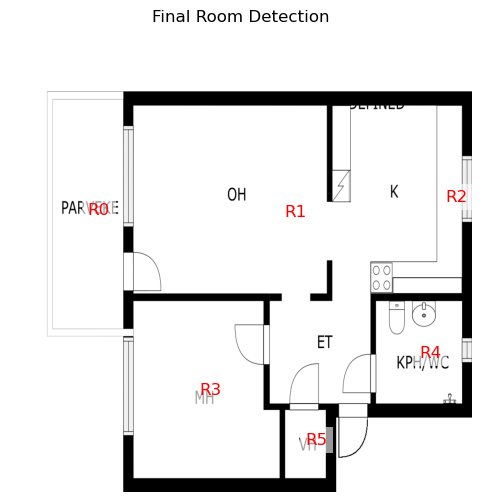

In [214]:
plt.figure(figsize=(6,6))
plt.imshow(img, cmap="gray")

for i, r in enumerate(rooms):
    y, x = r.centroid
    plt.text(x, y, f"R{i}", color="red", fontsize=12,
         bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))


plt.axis("off")
plt.title("Final Room Detection")
plt.show()
